<a href="https://colab.research.google.com/github/Mahjabeenqamar1/MRL_EYES/blob/main/Images_ML_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Classifier

In [ ]:
# Import the Libaray
import pandas as pd
import numpy as np

# Read the CSV file '10000'
data = pd.read_csv('/content/drive/MyDrive/PIAIC/mrlEyes_2018_01/data.csv')[:10000]
#Scaler form
from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

data = scale_data(data)

#Read the label csv file 
label = pd.read_csv('/content/drive/MyDrive/PIAIC/mrlEyes_2018_01/labels.csv')[:10000]

#split data 
x = data
y = label['eye_state']

#Train , Test and  Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

# Fit the model SVC
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train,y_train)

# Predic the Y_Test data
y_pred=svclassifier.predict(x_test)
print(y_pred)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("SVClassifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

#cross_val_score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svclassifier, X = x_train, y = y_train, cv = 10)
print("SVClassifier model accuracy(in %):", accuracies.mean()*100)
print("SVClassifier model accuracy(in %):", accuracies.std()*100)

#precision_score
from sklearn.metrics import precision_score
precision_score_svc = precision_score(y_test, y_pred, average='macro')
print(precision_score_svc)

#F1 score
from sklearn.metrics import f1_score
f1_score_svc = f1_score(y_test, y_pred, average='macro')
print(f1_score_svc)

# recall score
from sklearn.metrics import recall_score
recall_score_svc = recall_score(y_test, y_pred, average='macro')
print(recall_score_svc)
recall_score_svc = metrics.recall_score(y_test, y_pred, average='macro')
print(recall_score_svc)

#classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


[0 0 0 ... 0 0 1]
SVClassifier model accuracy(in %): 98.1
SVClassifier model accuracy(in %): 97.85000000000001
SVClassifier model accuracy(in %): 0.46029881598804967
0.976085379407339


In [ ]:
print("SVClassifier model accuracy for metrics(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print("SVClassifier model accuracy for cvs_mean (in %):", accuracies.mean()*100)
print("SVClassifier model accuracy for cvs_std(in %):", accuracies.std()*100)


SVClassifier model accuracy for metrics(in %): 98.1
SVClassifier model accuracy for cvs_mean (in %): 97.85000000000001
SVClassifier model accuracy for cvs_std(in %): 0.46029881598804967


In [ ]:
#F1 score
from sklearn.metrics import f1_score
f1_score_svc = f1_score(y_test, y_pred, average='macro')
print("SVClassifier model accuracy for f1_score_(in %):",f1_score_svc)

# recall score
from sklearn.metrics import recall_score
recall_score_svc = recall_score(y_test, y_pred, average='macro')

recall_score_svc = metrics.recall_score(y_test, y_pred, average='macro')
print("SVClassifier model accuracy for recall_score_svc(in %):",recall_score_svc)
#classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


SVClassifier model accuracy for f1_score_(in %): 0.9655234984576302
SVClassifier model accuracy for recall_score_svc(in %): 0.9556918300984409
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1661
           1       0.97      0.92      0.94       339

    accuracy                           0.98      2000
   macro avg       0.98      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000

[[1651   10]
 [  28  311]]


Confusion matrix, without normalization
[[1651   10]
 [  28  311]]


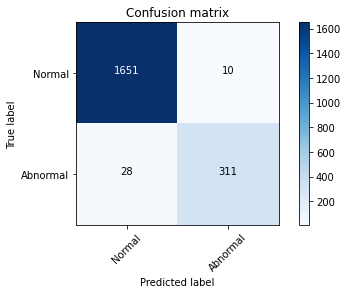

In [ ]:
# ccreate a graph for confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Close','Open'])

##RandomForestClassifier

In [ ]:
# Import the Libaray
import pandas as pd
import numpy as np

# Read the CSV file 
data = pd.read_csv('/content/drive/MyDrive/PIAIC/mrlEyes_2018_01/data.csv')[25000:50000]
#Scaler form
from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

#Read the label csv file 
label = pd.read_csv('/content/drive/MyDrive/PIAIC/mrlEyes_2018_01/labels.csv')[25000:50000]

#split data 
x = data
y = label['sensor_id']

#Train , Test and  Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
#Fit the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(x_train,y_train)

# Predic the Y_Test data
y_pred=model.predict(x_test)
print(y_pred)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("RandomForestClassifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

#cross_val_score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print("RandomForestClassifier model accuracy(in %):", accuracies.mean()*100)
print("RandomForestClassifier model accuracy(in %):", accuracies.std()*100)

#precision_score
from sklearn.metrics import precision_score
precision_score_svc = precision_score(y_test, y_pred, average='macro')
print(precision_score_svc)

#F1 score
from sklearn.metrics import f1_score
f1_score_svc = f1_score(y_test, y_pred, average='macro')
print(f1_score_svc)

# recall score
from sklearn.metrics import recall_score
recall_score_svc = recall_score(y_test, y_pred, average='macro')
print(recall_score_svc)
recall_score_svc = metrics.recall_score(y_test, y_pred, average='macro')
print(recall_score_svc)

#classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



[1. 1. 1. ... 1. 2. 1.]
RandomForestClassifier model accuracy(in %): 98.8
RandomForestClassifier model accuracy(in %): 98.59500000000001
RandomForestClassifier model accuracy(in %): 0.18901058171435892
0.9577045254278082
0.9523209791705947
0.9470463330566957
0.9470463330566957
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      4439
         2.0       1.00      0.98      0.99       330
         3.0       0.88      0.86      0.87       231

    accuracy                           0.99      5000
   macro avg       0.96      0.95      0.95      5000
weighted avg       0.99      0.99      0.99      5000

[[4416    0   23]
 [   1  325    4]
 [  32    0  199]]


## KNeighborsClassifier

In [ ]:
# import the libaray
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the CSV file '10000'
data = pd.read_csv('/content/drive/MyDrive/PIAIC/mrlEyes_2018_01/data.csv')[50000:70000]
#Scaler form
from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

#Read the label csv file 
label = pd.read_csv('/content/drive/MyDrive/PIAIC/mrlEyes_2018_01/labels.csv')[50000:70000]
y_sensor = label['sensor_id']
#Label encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_sensor)
z = le.transform(y_sensor)
print(z)
#split data 
x = data
y = z

#Train , Test and  Split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state = 1)

#Fit the KNN model
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
y_pred=knn_clf.predict(x_test) #These are the predicted output values

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("KNeighborsClassifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

#cross_val_score
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn_clf, X = x_train, y = y_train, cv = 10)
print("KNeighborsClassifier model accuracy(in %):", accuracies.mean()*100)
print("KNeighborsClassifier model accuracy(in %):", accuracies.std()*100)



#precision_score
from sklearn.metrics import precision_score
precision_score_svc = precision_score(y_test, y_pred, average='macro')
print(precision_score_svc)

#F1 score
from sklearn.metrics import f1_score
f1_score_svc = f1_score(y_test, y_pred, average='macro')
print(f1_score_svc)

# recall score
from sklearn.metrics import recall_score
recall_score_svc = recall_score(y_test, y_pred, average='macro')
print(recall_score_svc)
recall_score_svc = metrics.recall_score(y_test, y_pred, average='macro')
print(recall_score_svc)

#classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



[0 0 0 ... 0 0 0]
KNeighborsClassifier model accuracy(in %): 99.7
KNeighborsClassifier model accuracy(in %): 99.68125
KNeighborsClassifier model accuracy(in %): 0.1592217400357132
0.9971202758233446
0.9969712075416932
0.9968267553775596
0.9968267553775596
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2192
           1       1.00      1.00      1.00      1808

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[2189    3]
 [   9 1799]]


Confusion matrix, without normalization
[[2189    3]
 [   9 1799]]


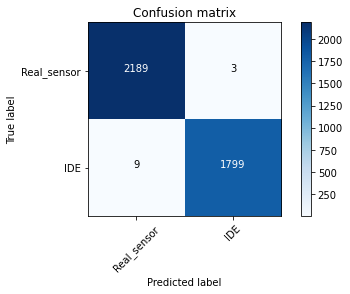

In [ ]:
# ccreate a graph for confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Real_sensor','IDE',])

##Image classification CVS file and Deep learning

*   Import Libraries
*   Read CSV files
*   Split Data
*   Train , Test and  Split dataset

In [ ]:
# Import the Libaray
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Read the CSV file '10000'
data = pd.read_csv('/content/drive/MyDrive/PIAIC/mrlEyes_2018_01/data.csv')[45000:60000]
# #Scaler form


def scale_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

# read label
label = pd.read_csv('/content/drive/MyDrive/PIAIC/mrlEyes_2018_01/labels.csv')[45000:60000]

#split data 
x = data
y = label['eye_state']

#Train , Test and  Split data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

##Model compliation


*   Loss Function
*   Optimizer
*   Metrics



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(6400,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
    ])
#compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#fit the model
history = model.fit(x_train, y_train,
          batch_size=32, epochs=5,verbose = 1 , validation_split= 0.2)
# evaluate model
test_loss , test_acc = model.evaluate(x_test,y_test)
print(test_acc)

#predictions the model
predictions = (model.predict(x_test)).astype("int32")
accuracy_score(y_test,predictions)
pred = model.predict(x_test)
print(pred)

#Model History
history.history

import sklearn.metrics
r = sklearn.metrics.confusion_matrix(y_test, predictions)
print(r)

Epoch 1/5
300/300 [==============================] - 5s 6ms/step - loss: 21075.9043 - accuracy: 0.8628 - val_loss: 0.4726 - val_accuracy: 0.8788
Epoch 2/5
300/300 [==============================] - 1s 5ms/step - loss: 0.4452 - accuracy: 0.8682 - val_loss: 0.4083 - val_accuracy: 0.8788
Epoch 3/5
300/300 [==============================] - 1s 4ms/step - loss: 0.4098 - accuracy: 0.8682 - val_loss: 0.3864 - val_accuracy: 0.8788
Epoch 4/5
300/300 [==============================] - 1s 5ms/step - loss: 0.3976 - accuracy: 0.8682 - val_loss: 0.3776 - val_accuracy: 0.8788
Epoch 5/5
94/94 [==============================] - 1s 4ms/step - loss: 0.3887 - accuracy: 0.8700
0.8700000047683716
[[0.8459323]
 [0.8459323]
 [0.8459323]
 ...
 [0.8459323]
 [0.8459323]
 [0.8459323]]
[[ 390    0]
 [2610    0]]


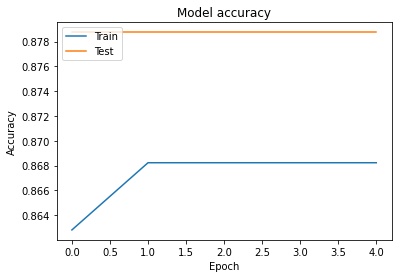

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
!pip install h5py
!pip install pickle-mixin

#import library
import pickle

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=15506c3f9135c17cedca92ef58f275f7048501ddc0cb4416f51a42d772d0547f
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [ ]:
filename = 'Images_ML_Classifier_model.h5'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://b5d29650-e39f-4f4e-8c7b-a3c4caf998e5/assets
